## Part-1: Data Exploration and Pre-processing

In [197]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

#### 1) load the given dataset
#### 2) Print al Column names
#### 3) Describe the Data

In [ ]:
Data = pd.read_csv("./DecisionTree.csv")
display(Data)

Null = Data.isnull().mean() * 100
print(Null)

Cols = Data.columns
print(Cols)

Info = Data.info()
print(Info)

Stat = Data.describe()
print(Stat)



#### 4) Drop the column 'Unnamed'

In [ ]:
New_Data = Data.drop(columns = ["Unnamed: 0"])
display(New_Data)

Cols = New_Data.columns
# print("\nColumns = ", Cols)

#### 5) Replace all the " " in column with "_"

In [ ]:
New_Data.columns = New_Data.columns.str.replace(" ", "_")
display(New_Data.columns)

#### 6) Give label to a satisfaction column value without using any encoding method

In [ ]:
New_Data["satisfaction"] = New_Data["satisfaction"].map(
    {
        "satisfied": 1,
        "neutral or dissatisfied": 0
    }
)
display(New_Data["satisfaction"])

#### 7) Plot the number of statisfied customers and the number of unsatisfied customers

In [ ]:
# Plotting the number of satisfied customers and the number of unsatisfied customers
plt.figure(figsize=(10,5))
plt.bar(range(2), New_Data['satisfaction'].value_counts(), color='green', label='Satisfied')
plt.bar(range(2), New_Data['satisfaction'].value_counts()[0], bottom=New_Data['satisfaction'].value_counts()[0], color='red', label='Unsatisfied')
plt.xlabel('satisfaction')
plt.ylabel('Count')
plt.title('satisfaction Distribution')
plt.legend()
plt.show()



#### 8) find the Mean value of satisfaction of male and female customers

In [ ]:
Female_Mean = New_Data[New_Data["Gender"] == "Female"]["satisfaction"].mean() * 100
Male_Mean = New_Data[New_Data["Gender"] == "Male"]["satisfaction"].mean() * 100


# Print mean of satisfaction for females and males
print("\nFemale Mean Satisfied = ", Female_Mean)
print("\nMale Mean Satisf4ied = ", Male_Mean)



#### 9) find the Mean value of satisfaction of customers with repect to age

In [ ]:
# cusomter with repect age
Mean_Customer_Age = New_Data.groupby("Customer_Type")["Age"].mean() * 100
print("\nCustomer With Resoect to Age Mean = ", Mean_Customer_Age)



#### 10) find the Mean value of satisfaction of customer with Food_&_Drink

In [ ]:
Q10 = New_Data.groupby("Customer_Type")[["Food_and_drink", "satisfaction"]].mean() * 100
print("\nMean value of satisfaction of customer with Food & Drink = \n", Q10)


#### 11) Display a boxplot for Flight_Distance

In [ ]:
plt.title("Flight Distant Box Plot")
plt.boxplot(New_Data["Flight_Distance"],labels=['Flight Distance'])
plt.show()

#### 12) Display a boxplot for Checkin_service

In [ ]:
plt.title("Checking Service Box Plot")
plt.boxplot(New_Data["Checkin_service"],labels=['Check-in Service'])
plt.show()

#### 13) Find the all Null values
#### 14) Drop all the na values

In [ ]:
Check_Null = Data.isnull().mean() * 100 
print(Check_Null)

Data.dropna(inplace = True)

#### 15) Find the unique values in Flight_Distance

In [ ]:
Flight_Values = New_Data["Flight_Distance"].unique().tolist()
print("Unique Values of Flight = ", Flight_Values)

###

## Part-2: Working with models

#### 1) Perform encoding in columns Gender, Customer_Type, Tyoe_of_Travel, and Class

In [ ]:
Gender = New_Data["Gender"]
C_Type = New_Data["Customer_Type"]
T_Travel = New_Data['Type_of_Travel']
Class = New_Data["Class"]


New_Data["Gender"] = OneHotEncoder().fit_transform(New_Data["Gender"].values.reshape(-1, 1)).toarray()
New_Data["Customer_Type"] = OneHotEncoder().fit_transform(New_Data["Customer_Type"].values.reshape(-1, 1)).toarray()
New_Data["Type_of_Travel"] = OneHotEncoder().fit_transform(New_Data["Type_of_Travel"].values.reshape(-1, 1)).toarray()

New_Data["Class"] = New_Data["Class"].astype(str)
New_Data.loc[New_Data["Class"] == 'Eco Plus', "Class"] = 0
New_Data.loc[New_Data["Class"] == 'Business', "Class"] = 1
New_Data.loc[New_Data["Class"] == 'Eco', "Class"] = 2


In [ ]:
display(New_Data["Gender"].unique())
display(New_Data["Customer_Type"].unique())
display(New_Data["Type_of_Travel"].unique())
display(New_Data["Class"].unique())

#### 2) Drop the column id and unnamed:_0.1

In [ ]:
New_Data.drop(columns=["id", "Unnamed:_0.1"], inplace=True)

#### 3) Create feature and target Data

In [ ]:
X = New_Data.drop(columns="satisfaction")
Y = New_Data["satisfaction"]

#### 4) Perform the scaling on features data

In [ ]:
Cols = X.columns
# print(Cols)

for i in Cols:
    Scalar = StandardScaler()
    X[i] = Scalar.fit_transform(X[i].values.reshape(-1, 1))

display(X)


#### 5) split the data in training and testing sets

#### 6) Fit the desiction tree model with various parameters

In [213]:
X_train, X_test, Y_train, Y_test = TTS(X, Y, train_size = 0.8, random_state = 0)

Tree_Model = DecisionTreeClassifier()
Tree_Model.fit(X_train, Y_train)

Y_Pred = Tree_Model.predict(X_test)
print("\nY Prediction = ", Y_Pred)

Train, Test = Tree_Model.score(X_train, Y_train) * 100, Tree_Model.score(X_test, Y_test) * 100
print("\nTraining Score = ", Train)
print("\nTesting Score = ", Test)



Y Prediction =  [0 0 0 ... 0 1 0]

Training Score =  100.0

Testing Score =  91.25


#### 7) Create a function to display classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score


[1] For Classification Report

[2] For Confusion Matrix

[3] For Accuracy Score

[4] For F1 Score

[5] For Precision Score

[6] For Recall Score


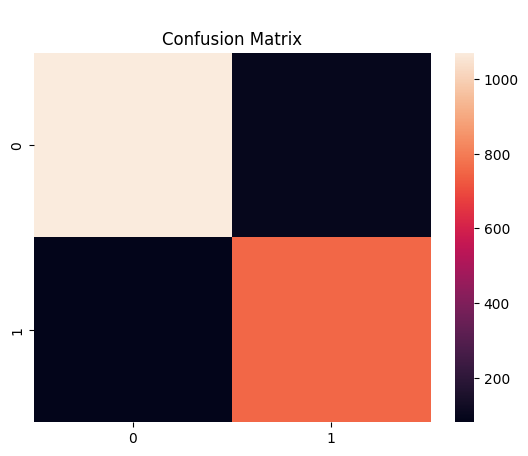

In [236]:
def Score_Fn(Select):
    if Select == 1:
        Report = pd.DataFrame(classification_report(Y_test.ravel(), Y_Pred.ravel(), output_dict=True)).T
        display(Report)
    elif Select == 2:
        plt.title("\nConfusion Matrix")
        Matrix = confusion_matrix(Y_test, Y_Pred)
        sns.heatmap(Matrix)
        plt.show()
    elif Select == 3:
        Accuracy_Score = accuracy_score(Y_test, Y_Pred) * 100
        print("\nAccuracy Score = ", Accuracy_Score)
    elif Select == 4:
        F1_Score = f1_score(Y_test, Y_Pred) * 100
        print("\nAccuracy Score = ", F1_Score)
    elif Select == 5:
        Precision_Score = precision_score(Y_test, Y_Pred) * 100
        print("\nAccuracy Score = ", Precision_Score)
    elif Select == 6:
        Recall_Score = recall_score(Y_test, Y_Pred) * 100
        print("\nAccuracy Score = ", Recall_Score)
    else:
        print("\nInvalid Input")


print("\n[1] For Classification Report")
print("\n[2] For Confusion Matrix")
print("\n[3] For Accuracy Score")
print("\n[4] For F1 Score")
print("\n[5] For Precision Score")
print("\n[6] For Recall Score")


Choice = int(input("\nEnter Your Choice: "))
Score_Fn(Choice)


In [237]:
Export = New_Data.to_csv("Data2.csv", index=False)